In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, PooledOLS

In [2]:
revenue= pd.read_excel('Revenue.xlsx')
revenue.head().iloc[:, -19:]

,Price,Market Cap ▾,Volume,% (1D),% (1M),% (6M),Sector,Backed by VC or not,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,216.77,702420000000,40.31M,-0.0156,0.1042,0.1832,Automotive / Technology,1,1.16744,204.242,413.256,2013.496,3198.356,4046.025,7000.132,11759.000,21461.000,24578.00,31356.000
1,393.45,64320000000,68084,0.0202,0.0205,0.2024,Technology / Communication Equipment,0,7617.00000,8203.000,6269.000,6227.000,5881.000,5695.000,6038.000,6380.000,7343.000,7887.00,7414.000
2,251.11,63280000000,516.49K,0.0148,-0.0621,0.1692,Technology / Semiconductors,1,4402.00000,4194.000,4358.000,4815.000,5647.000,6101.000,9498.000,9256.000,9407.000,8877.00,8612.000
3,72.24,16820000000,930.04K,0.0637,0.1673,0.1793,Technology / Software,1,328.90500,370.828,551.842,712.702,767.861,1000.285,1481.400,1675.300,3421.100,4632.90,4667.900
4,100.00,9020000000,105.13K,0.0131,0.0475,0.2210,Industrials / Nuclear Technology,0,2688.81100,2952.040,3291.359,1546.663,1450.610,1415.529,1550.573,1687.738,1799.889,1894.92,2123.516


In [3]:
revenue.columns = ['Index', 'Symbol', 'Price', 'Market Cap', 'Volume', '1D%', '1M%','6M%','Sector', 'VC', '2010',                
'2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020' ]
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       30 non-null     int64  
 1   Symbol      30 non-null     object 
 2   Price       30 non-null     float64
 3   Market Cap  30 non-null     int64  
 4   Volume      30 non-null     object 
 5   1D%         30 non-null     float64
 6   1M%         30 non-null     float64
 7   6M%         30 non-null     float64
 8   Sector      30 non-null     object 
 9   VC          30 non-null     int64  
 10  2010        30 non-null     float64
 11  2011        30 non-null     float64
 12  2012        30 non-null     float64
 13  2013        30 non-null     float64
 14  2014        30 non-null     float64
 15  2015        30 non-null     float64
 16  2016        30 non-null     float64
 17  2017        30 non-null     float64
 18  2018        30 non-null     float64
 19  2019        30 non-null     flo

In [4]:
revenue.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,43.600000,83.981717,3.188685e+10,0.006827,0.074627,0.055480,0.666667,929.512415,987.153233,990.56970,1044.803300,1125.414900,1225.877367,1517.261367,1810.093500,2333.704500,2554.543667,2937.385733
std,32.188668,107.724922,1.276533e+11,0.039631,0.142125,0.289288,0.479463,1762.713369,1830.565266,1665.70652,1709.956203,1778.477739,1876.695179,2453.352140,2922.104413,4337.989891,4839.435696,5909.118904
min,1.000000,0.527500,3.660000e+06,-0.142700,-0.153600,-0.703000,0.000000,0.000000,0.097000,0.18900,0.002000,0.189000,0.210000,0.224000,0.329000,0.430000,0.283000,0.239000
25%,18.500000,5.207500,4.568375e+08,0.000525,-0.006900,-0.039800,0.000000,25.656750,59.361750,67.16925,32.352250,62.045500,69.011500,64.553500,74.539500,77.635250,85.627500,91.583000
50%,35.000000,17.260000,3.295000e+09,0.008400,0.048800,0.066300,1.000000,123.012000,148.080500,196.60000,234.232500,298.222000,351.529500,436.491000,491.732000,564.802000,636.186500,1040.968500
75%,64.250000,168.055000,8.412500e+09,0.021625,0.119375,0.182375,1.000000,488.560000,684.713500,561.50950,1099.924000,1194.787250,1303.220500,1509.663000,1688.761000,2551.560750,2546.263000,3216.375500
max,109.000000,393.450000,7.024200e+11,0.105000,0.538700,0.784500,1.000000,7617.000000,8203.000000,6269.00000,6227.000000,5881.000000,6101.000000,9498.000000,11759.000000,21461.000000,24578.000000,31356.000000


In [5]:
nonvc= revenue[revenue['VC']==0]
nonvc.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,28.400000,137.351000,1.338166e+10,0.004480,0.040990,0.048410,0.0,1963.473400,2044.507000,1992.992200,1927.366100,1894.448400,1934.850200,2027.627000,2301.471600,2578.841300,2733.233600,2956.48150
std,20.876356,126.864753,1.932862e+10,0.011613,0.081413,0.101801,0.0,2472.410783,2633.726567,2264.038068,2302.279253,2214.313383,2229.065644,2319.004824,2371.008457,2633.440268,2835.413728,2879.82286
min,3.000000,12.280000,4.397300e+08,-0.024300,-0.153600,-0.077700,0.0,18.207000,24.054000,26.664000,33.643000,31.254000,31.110000,32.984000,25.777000,31.090000,43.125000,46.03500
25%,12.500000,26.562500,1.602500e+09,0.002300,0.024700,-0.025900,0.0,122.198000,142.262500,179.132250,202.454500,181.645750,203.719500,257.698250,285.467750,296.256500,324.230500,401.07500
50%,21.500000,103.630000,7.315000e+09,0.006200,0.048800,0.021050,0.0,899.483500,805.618500,833.055000,900.524000,977.160500,1033.999500,1111.092000,1688.420000,1849.866000,1973.712000,2170.52850
75%,44.250000,222.460000,1.700750e+10,0.009100,0.094275,0.099750,0.0,3157.317250,3347.541250,3568.655750,3492.309250,3642.899000,3560.172750,3424.680500,3768.385750,4580.500000,4842.667000,5260.50500
max,65.000000,393.450000,6.432000e+10,0.020200,0.139900,0.221000,0.0,7617.000000,8203.000000,6269.000000,6227.000000,5881.000000,5695.000000,6038.000000,6380.000000,7343.000000,7887.000000,7414.00000


In [6]:
vc= revenue[revenue['VC']==1]
vc.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,20.000000,20.000000,2.000000e+01,20.00000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,51.200000,57.297075,4.113944e+10,0.00800,0.091445,0.059015,1.0,412.531922,458.476350,489.358450,603.521900,740.898150,871.390950,1262.078550,1564.404450,2211.136100,2465.198700,2927.837850
std,34.533889,88.543451,1.562835e+11,0.04826,0.163701,0.350407,0.0,1001.475983,972.774413,1006.745401,1156.364356,1427.671406,1620.255326,2536.491758,3190.489282,5038.849508,5649.168115,7026.142961
min,1.000000,0.527500,3.660000e+06,-0.14270,-0.116200,-0.703000,1.0,0.000000,0.097000,0.189000,0.002000,0.189000,0.210000,0.224000,0.329000,0.430000,0.283000,0.239000
25%,22.500000,1.917500,2.585300e+08,-0.00095,-0.011575,-0.058900,1.0,7.182000,30.804750,24.829750,19.011500,27.238250,32.952250,39.893250,42.181750,50.572250,53.011250,76.433750
50%,50.000000,10.155000,1.045000e+09,0.01475,0.063600,0.102050,1.0,83.823000,123.521500,153.755500,179.584000,160.858500,172.127000,233.555000,259.180500,297.439500,353.768500,439.931000
75%,77.250000,64.485000,6.612500e+09,0.02545,0.151025,0.198500,1.0,330.387500,378.876250,446.513250,590.601250,620.605000,714.421750,783.267250,1137.447500,1457.697750,1828.997250,2347.548500
max,109.000000,251.110000,7.024200e+11,0.10500,0.538700,0.784500,1.0,4402.000000,4194.000000,4358.000000,4815.000000,5647.000000,6101.000000,9498.000000,11759.000000,21461.000000,24578.000000,31356.000000


In [7]:
corr= revenue[['VC', 'Market Cap','Price', '2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']].corr()
corr

,VC,Market Cap,Price,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
VC,1.000000,0.104258,-0.356305,-0.421861,-0.415415,-0.432812,-0.371199,-0.310988,-0.271696,-0.149613,-0.120939,-0.040641,-0.026555,-0.002324
Market Cap,0.104258,1.000000,0.327445,0.005799,0.023484,0.033018,0.206171,0.318922,0.378194,0.514734,0.720504,0.887160,0.907777,0.943902
Price,-0.356305,0.327445,1.000000,0.671208,0.674867,0.634942,0.683789,0.699863,0.677584,0.653370,0.650097,0.565344,0.539275,0.477040
2010,-0.421861,0.005799,0.671208,1.000000,0.997137,0.983463,0.946787,0.900066,0.857954,0.747779,0.606142,0.400089,0.357620,0.258731
2011,-0.415415,0.023484,0.674867,0.997137,1.000000,0.978508,0.939346,0.891981,0.849403,0.735411,0.603144,0.406816,0.366850,0.269153
2012,-0.432812,0.033018,0.634942,0.983463,0.978508,1.000000,0.962721,0.924138,0.891798,0.783858,0.646204,0.439413,0.397096,0.301574
2013,-0.371199,0.206171,0.683789,0.946787,0.939346,0.962721,1.000000,0.987119,0.969676,0.888024,0.783548,0.602976,0.563802,0.473848
2014,-0.310988,0.318922,0.699863,0.900066,0.891981,0.924138,0.987119,1.000000,0.994458,0.944932,0.861823,0.699913,0.660363,0.574788
2015,-0.271696,0.378194,0.677584,0.857954,0.849403,0.891798,0.969676,0.994458,1.000000,0.966850,0.897833,0.748007,0.710114,0.629102
2016,-0.149613,0.514734,0.653370,0.747779,0.735411,0.783858,0.888024,0.944932,0.966850,1.000000,0.959509,0.839519,0.801914,0.731493


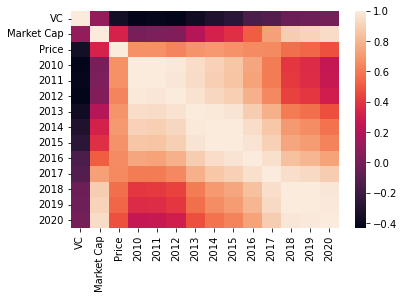

In [8]:
import seaborn as sns
sns.heatmap(corr);

In [9]:
reg= revenue[['VC', '2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
reg.head()

,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1.16744,204.242,413.256,2013.496,3198.356,4046.025,7000.132,11759.000,21461.000,24578.00,31356.000
1,0,7617.00000,8203.000,6269.000,6227.000,5881.000,5695.000,6038.000,6380.000,7343.000,7887.00,7414.000
2,1,4402.00000,4194.000,4358.000,4815.000,5647.000,6101.000,9498.000,9256.000,9407.000,8877.00,8612.000
3,1,328.90500,370.828,551.842,712.702,767.861,1000.285,1481.400,1675.300,3421.100,4632.90,4667.900
4,0,2688.81100,2952.040,3291.359,1546.663,1450.610,1415.529,1550.573,1687.738,1799.889,1894.92,2123.516


In [10]:
df_long = reg.melt(id_vars=['VC'], var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)
year = df_long.Year
df_long = df_long.set_index([df_long.index, 'Year'])
df_long['Year'] = pd.Categorical(year)
df_long

,,VC,Value,Year
,Year,,,
0,2010,1,1.16744,2010
1,2010,0,7617.00000,2010
2,2010,1,4402.00000,2010
3,2010,1,328.90500,2010
4,2010,0,2688.81100,2010
...,...,...,...,...
325,2020,0,5871.64000,2020
326,2020,0,2217.54100,2020
327,2020,0,3427.10000,2020


# Pooled Regression

In [11]:
exog_vars = ['Year', 'VC']
exog = sm.add_constant(df_long[exog_vars])
mod = PooledOLS(df_long['Value'], exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Value   R-squared:                        0.0653
Estimator:                  PooledOLS   R-squared (Between):              0.0653
No. Observations:                 330   R-squared (Within):               0.0000
Date:                Sat, Aug 17 2024   R-squared (Overall):              0.0653
Time:                        15:37:49   Log-likelihood                   -3119.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.0212
Entities:                         330   P-value                           0.0260
Avg Obs:                       1.0000   Distribution:                  F(11,318)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             2.0212
                            

In [12]:
df_long.to_csv(r'Revenue_PanelData.csv')

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Prepare the features and target
X = df_long[['Year', 'Value']]  # Features
y = df_long['VC']  # Target

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=877)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's coefficients and evaluation metrics
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:\n', conf_matrix)

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

Intercept: [1.89732327e-07]
Coefficients: [[ 3.82579029e-04 -6.67109115e-05]]
Accuracy: 0.6867469879518072
Precision: 0.6867469879518072
Recall: 1.0
F1 Score: 0.8142857142857143
ROC AUC: 0.7044534412955465
Confusion Matrix:
 [[ 0 26]
 [ 0 57]]
Cross-Validation Accuracy Scores: [0.66666667 0.66666667 0.66666667 0.60606061 0.6969697 ]
Mean Cross-Validation Accuracy: 0.6606060606060605


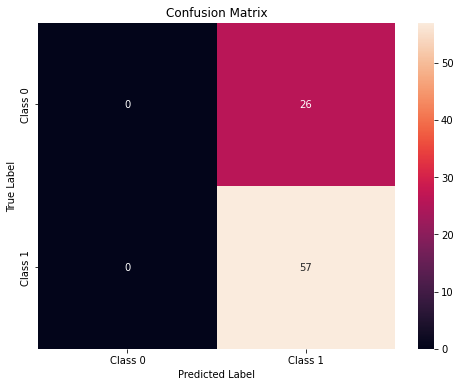

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


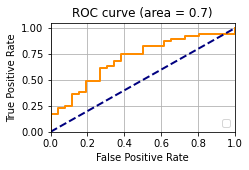

In [16]:
from sklearn.metrics import roc_curve

# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(3.3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (area = 0.7)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



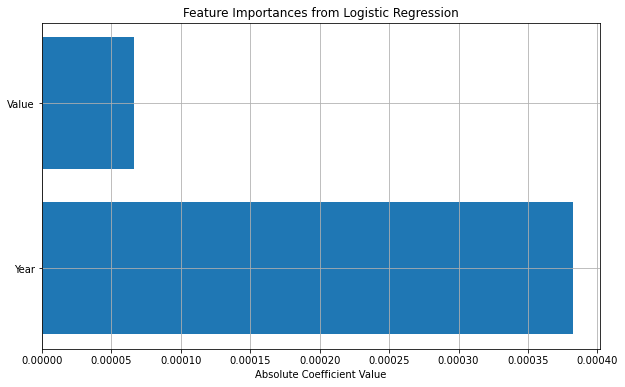

In [17]:
coefficients = model.coef_[0]
features = X.columns
feature_importances = np.abs(model.coef_[0])
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.grid(True)
plt.show()

# Exploratory Data Analysis 

In [18]:
ones= revenue[revenue['VC']==1]
ones= ones[['Symbol','2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
df =ones
df.iloc[:, -11:]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1.16744,204.242,413.256,2013.496,3198.356,4046.025,7000.132,11759.000,21461.000,24578.000,31356.000
2,4402.00000,4194.000,4358.000,4815.000,5647.000,6101.000,9498.000,9256.000,9407.000,8877.000,8612.000
3,328.90500,370.828,551.842,712.702,767.861,1000.285,1481.400,1675.300,3421.100,4632.900,4667.900
5,505.71200,743.570,564.732,641.542,677.854,773.587,976.747,1420.490,1371.925,1584.335,1641.836
6,44.59700,57.969,77.106,104.391,127.947,158.518,193.153,220.085,248.240,279.124,312.630
7,1540.07900,1826.945,1913.910,1980.732,2409.803,2974.961,3202.288,3306.733,3521.627,3450.631,3045.578
8,162.02200,143.811,145.817,170.778,193.770,185.736,176.448,186.737,200.352,191.100,150.409
9,98.05200,123.178,157.266,242.535,348.748,420.919,578.164,683.679,812.363,900.127,998.230
10,43.85700,65.871,150.245,22.881,76.436,149.555,273.957,298.276,346.639,428.413,389.523
11,1.67400,33.863,25.983,28.181,60.594,92.782,90.714,93.468,78.626,90.891,78.893


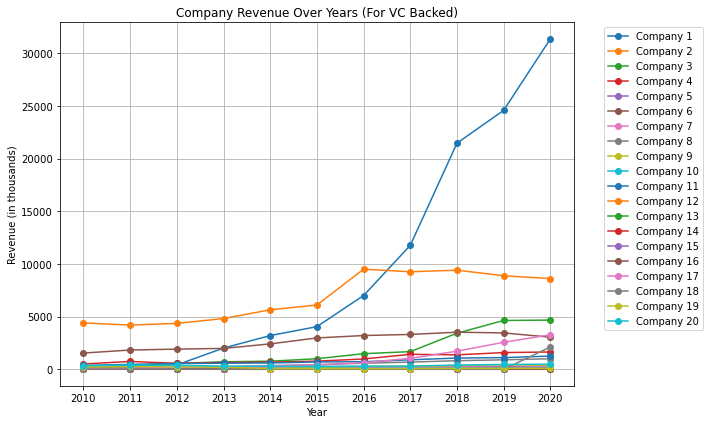

In [19]:
company_labels = {symbol: f'Company {i+1}' for i, symbol in enumerate(df['Symbol'])}
df['Symbol'] = df['Symbol'].replace(company_labels)

# Set the 'Symbol' column as the index
df.set_index('Symbol', inplace=True)

# Transpose the DataFrame to have years as rows and symbols as columns
df = df.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Revenue (in thousands)')
plt.title(r'Company Revenue Over Years (For VC Backed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()

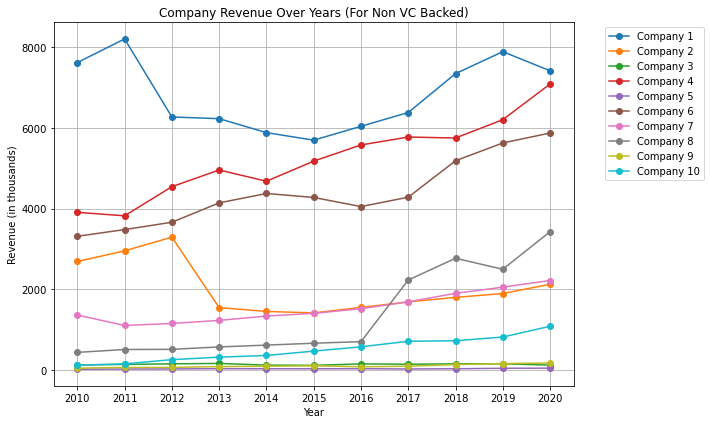

In [20]:
ones= revenue[revenue['VC']==0]
ones= ones[['Symbol','2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
df =ones
df
company_labels = {symbol: f'Company {i+1}' for i, symbol in enumerate(df['Symbol'])}
df['Symbol'] = df['Symbol'].replace(company_labels)

# Set the 'Symbol' column as the index
df.set_index('Symbol', inplace=True)

# Transpose the DataFrame to have years as rows and symbols as columns
df = df.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Revenue (in thousands)')
plt.title(r'Company Revenue Over Years (For Non VC Backed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()